In [1]:
import tensorflow as tf
from tensorflow import keras
from urllib.request import urlretrieve
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from IPython import display
from tensorflow.keras import models, layers, activations, initializers, regularizers
from tensorflow.keras.models import Model, Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [3]:
def prepare_data(X_train, y_train, X_test, y_test):
  X_train = X_train/255.
  X_test = X_test/255.
  # this part should be un-comment for mobile net
  # X_train = tf.image.resize(X_train, (96,96))
  # X_test = tf.image.resize(X_test, (96,96))
  print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
  print(f'before one hot y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}\n')
  y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=100, dtype='float32')
  y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=100, dtype='float32')
  print(f'after one hot Train_y shape: {y_train_one_hot.shape}\nVal_y shape: {y_test_one_hot.shape}')
  return X_train, X_test, y_train_one_hot, y_test_one_hot

In [4]:
X_train, X_test, y_train, y_test = prepare_data(X_train, y_train, X_test, y_test)

X_train shape: (50000, 32, 32, 3), X_test shape: (10000, 32, 32, 3)
before one hot y_train shape: (50000, 1)
y_test shape: (10000, 1)

after one hot Train_y shape: (50000, 100)
Val_y shape: (10000, 100)


In [10]:
input = layers.Input(shape=(32, 32, 3))

layer1 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal")(input)
# layer2 = layers.BatchNormalization()(layer1)
layer3 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer="he_normal")(layer1)
# layer4 = layers.BatchNormalization()(layer3)
layer5 = layers.MaxPooling2D(pool_size=(2,2))(layer3)
layer6 = layers.Dropout(0.3)(layer5)

layer7 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer6)
# layer8 = layers.BatchNormalization()(layer7)
layer9 = layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same',  kernel_initializer="he_normal")(layer7)
# layer10 = layers.BatchNormalization()(layer9)
layer11 = layers.MaxPooling2D(pool_size=(2,2))(layer9)
layer12 = layers.Dropout(0.4)(layer11)

layer13 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer12)
# layer14 = layers.BatchNormalization()(layer13)
layer14 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer13)
layer15 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer14)
# layer16 = layers.BatchNormalization()(layer15)
layer18 = layers.MaxPooling2D(pool_size=(2,2))(layer15)
layer19 = layers.Dropout(0.5)(layer18)

# layer20 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer19)
# layer21 = layers.BatchNormalization()(layer20)
# layer22 = layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer="he_normal")(layer21)
# layer23 = layers.BatchNormalization()(layer22)
# layer24 = layers.MaxPooling2D(pool_size=(2,2))(layer23)
# layer25 = layers.Dropout(0.5)(layer24)

layer26 = layers.Flatten()(layer19)
layer27 = layers.BatchNormalization()(layer26)
layer28 = layers.Dense(256, activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(1e-3))(layer27)
layer29 = layers.BatchNormalization()(layer28)
layer30 = layers.Dropout(0.5)(layer29)
layer31 = layers.BatchNormalization()(layer30)
layer32 = layers.Dense(256, activation='relu', kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(1e-3))(layer31)
layer33 = layers.BatchNormalization()(layer32)
layer34 = layers.Dropout(0.5)(layer33)

output = layers.Dense(100, activation='softmax')(layer34)

model = Model(input, output)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        36928     
                                                           

In [11]:
opt = tf.keras.optimizers.Adam()
model.compile(loss='CategoricalCrossentropy', optimizer=opt , metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/100
391/391 [==============================] - 11s 23ms/step - loss: 5.9248 - accuracy: 0.0218 - val_loss: 5.3032 - val_accuracy: 0.0245
Epoch 2/100
391/391 [==============================] - 9s 22ms/step - loss: 5.0443 - accuracy: 0.0416 - val_loss: 4.9285 - val_accuracy: 0.0303
Epoch 3/100
391/391 [==============================] - 9s 24ms/step - loss: 4.5650 - accuracy: 0.0662 - val_loss: 4.4338 - val_accuracy: 0.0676
Epoch 4/100
391/391 [==============================] - 9s 24ms/step - loss: 4.1945 - accuracy: 0.0955 - val_loss: 4.0478 - val_accuracy: 0.1090
Epoch 5/100
391/391 [==============================] - 9s 23ms/step - loss: 3.9144 - accuracy: 0.1238 - val_loss: 3.7728 - val_accuracy: 0.1420
Epoch 6/100
391/391 [==============================] - 9s 23ms/step - loss: 3.6840 - accuracy: 0.1544 - val_loss: 3.4454 - val_accuracy: 0.2016
Epoch 7/100
391/391 [==============================] - 9s 22ms/step - loss: 3.5133 - accuracy: 0.1808 - val_loss: 3.4848 - val_accuracy

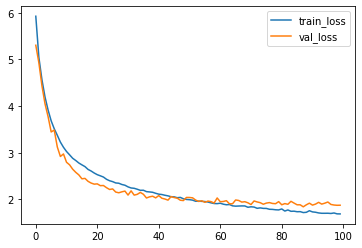

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])

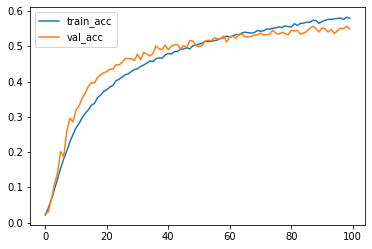

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])

In [5]:
def Mobile_net(summary=False):

  mobile_model = MobileNetV2(weights='imagenet', alpha=0.5, input_shape=(96,96,3), include_top=False)
  mobile_model.trainable = False
  
  inputs = layers.Input(shape=(96,96,3))
  x = mobile_model(inputs, training=False)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(2048, activation='relu', kernel_initializer='he_normal')(x)
  x = layers.Dense(2048, activation='relu', kernel_initializer='he_normal')(x)
  x = layers.Dropout(0.3)(x)
  prediction = layers.Dense(100, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=prediction)
  model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

  if summary:
    print(model.summary())

  return model

In [6]:
model = Mobile_net(summary=True)

3201480/3201480 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 mobilenetv2_0.50_96 (Functi  (None, 3, 3, 1280)       706224    
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2048)              2623488   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                

In [7]:
def fit_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  train_loss = []
  train_acc= []
  test_loss = []
  test_acc = []
  best_validation_accuracy = 0
  for i in range(epochs):
    st = time.time()
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size)
    trainloss = history.history['loss']
    trainacc = history.history['accuracy']
    train_loss.append(trainloss)
    train_acc.append(trainacc)

    score = model.evaluate(x=X_test, y=y_test, batch_size=5)
    testloss = score[0]
    testacc = score[1]
    test_loss.append(testloss)
    test_acc.append(testacc)

    if testacc > best_validation_accuracy:
      best_validation_accuracy = testacc
    
    fig = plt.figure(figsize=(9, 6))
    train_loss_plt, = plt.plot(range(len(train_loss)), train_loss, 'r', label='train_loss')
    train_acc_plt, = plt.plot(range(len(train_acc)), train_acc, 'g', label='train_acc')
    val_loss_plr, = plt.plot(range(len(test_loss)), test_loss, alpha=0.3, color='r', label='val_loss')
    val_acc_plt, = plt.plot(range(len(test_acc)), test_acc, alpha=0.3, color='g', label='val_acc')
    plt.legend([train_loss_plt, train_acc_plt, val_loss_plr, val_acc_plt],
               ['training loss', 'training accuracy', 'validation loss', 'validation accuracy'],
               loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Best validation accuracy = {:.2f}%'.format(100. * best_validation_accuracy))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.2)

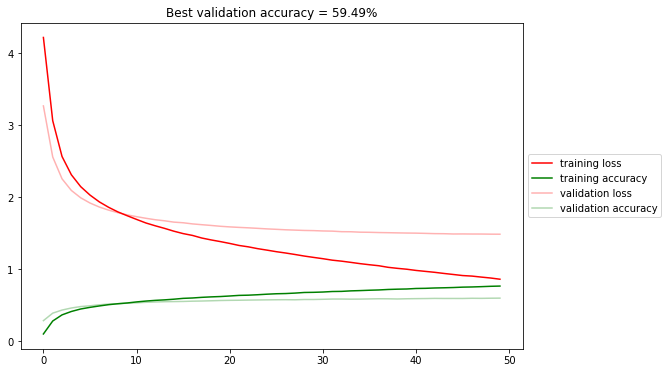

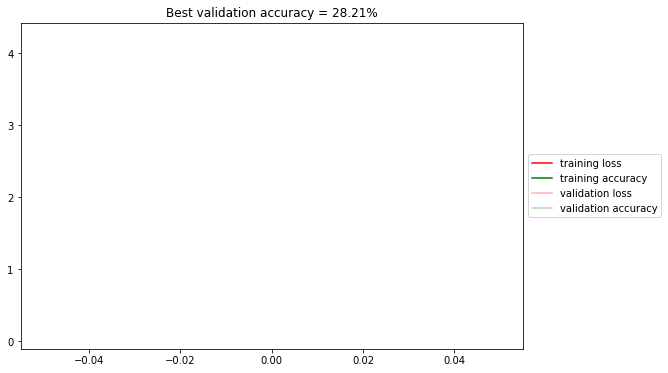

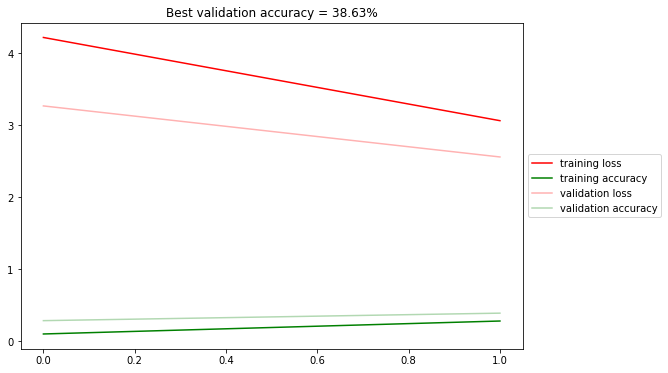

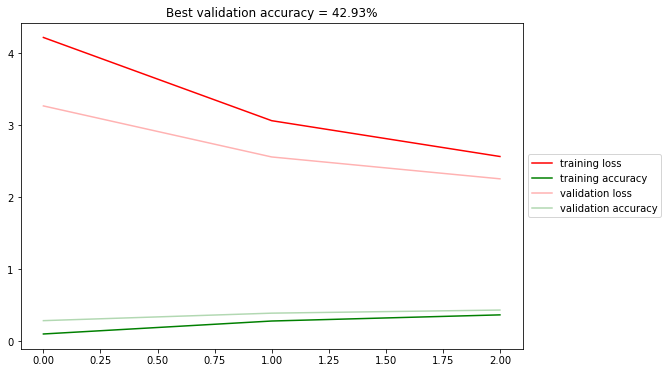

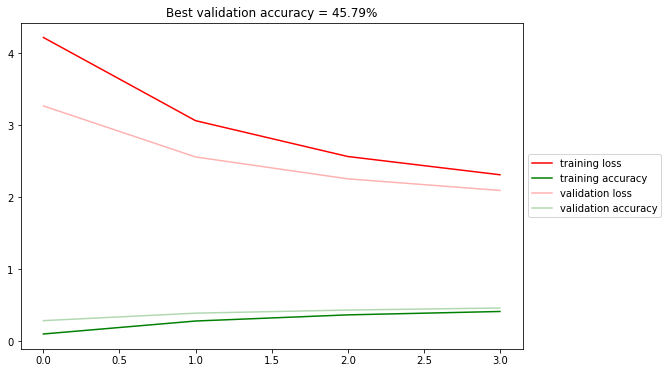

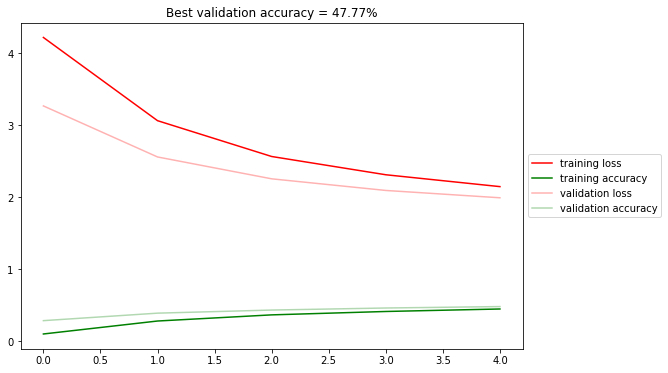

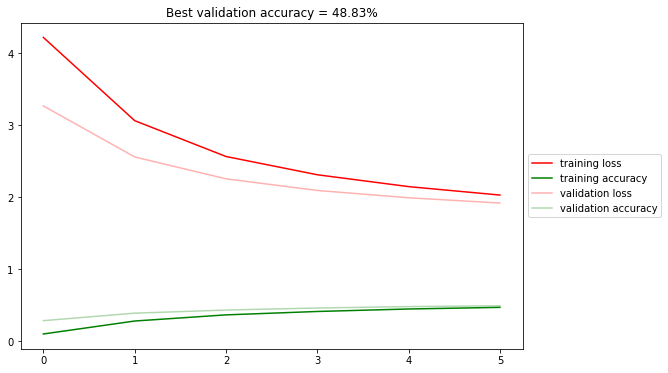

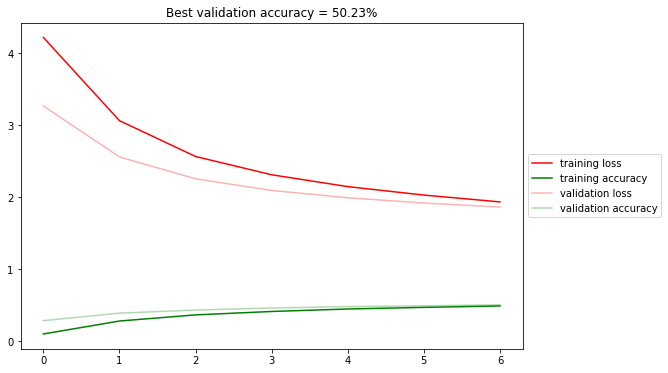

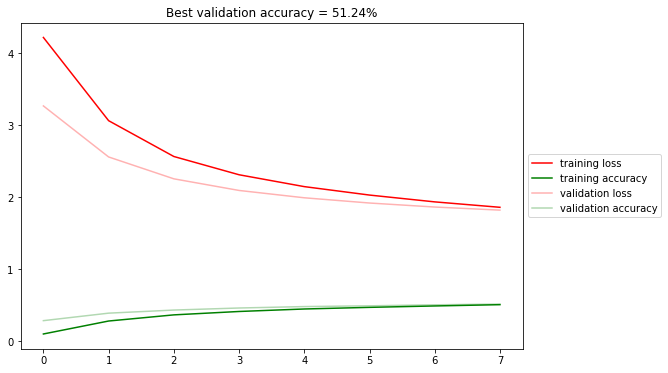

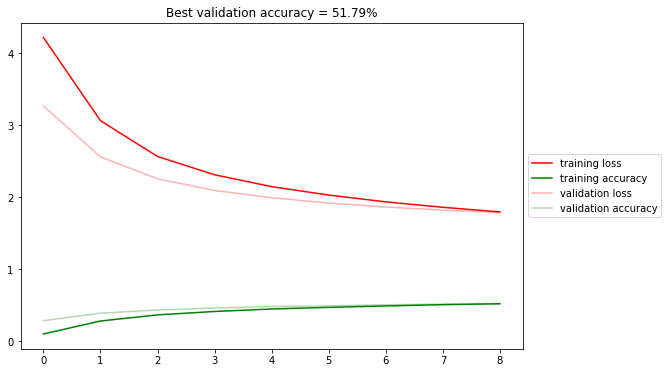

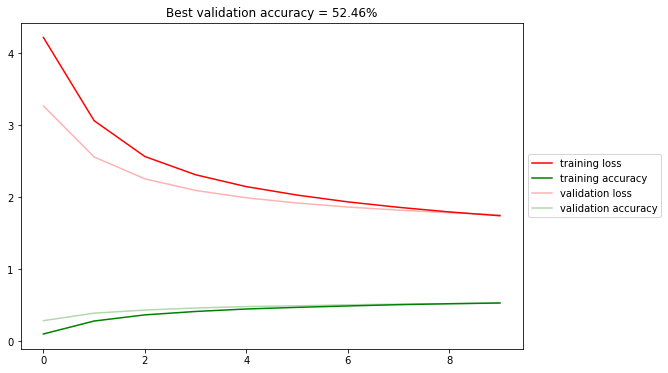

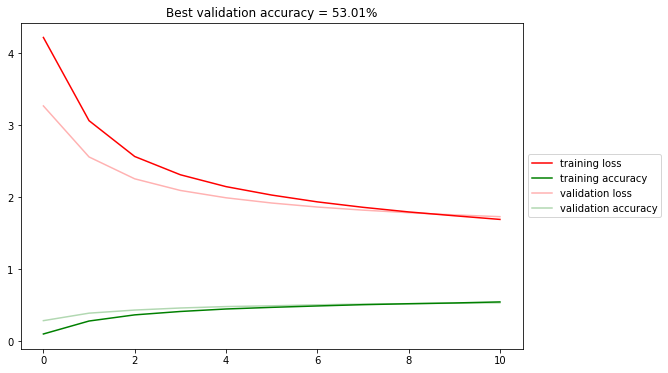

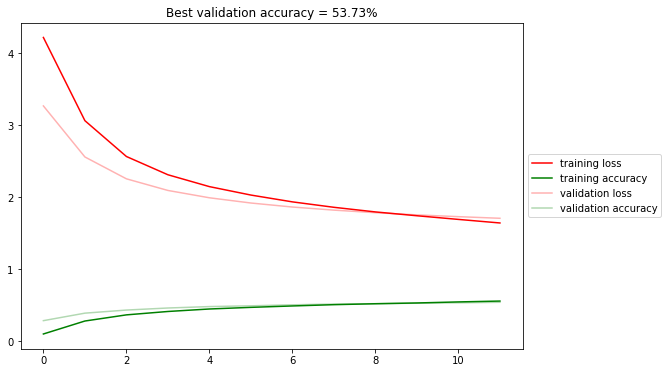

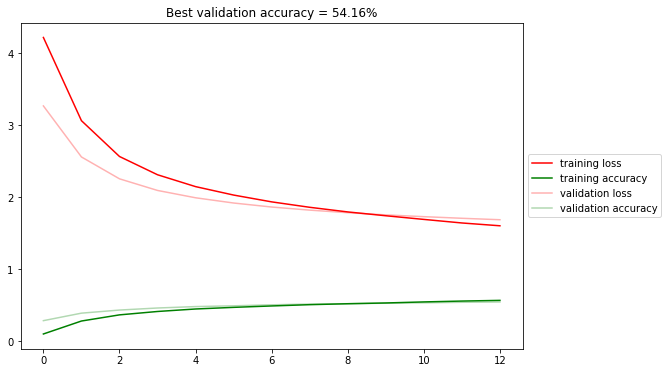

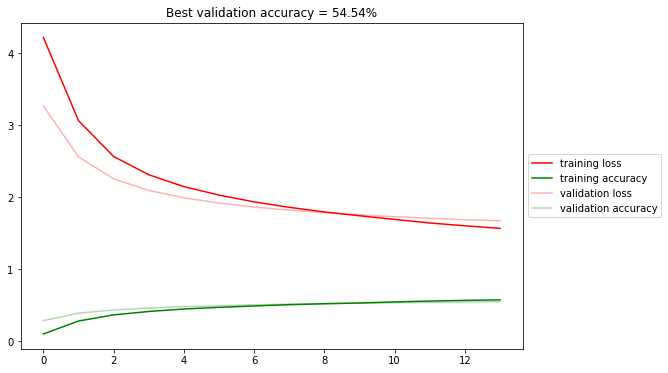

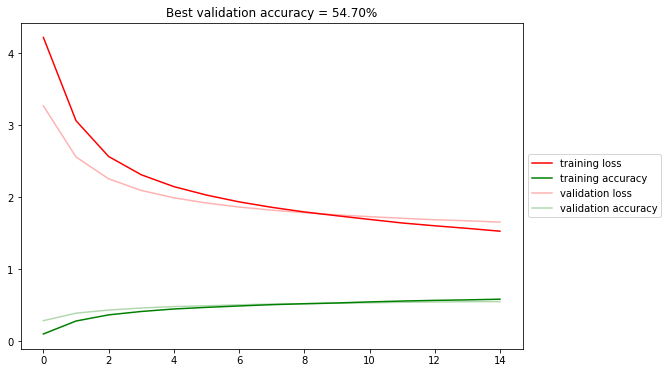

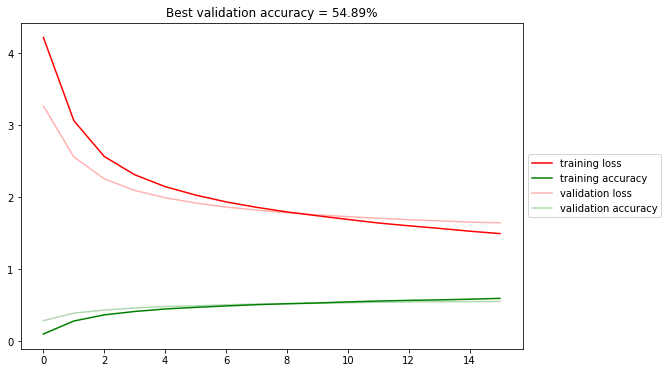

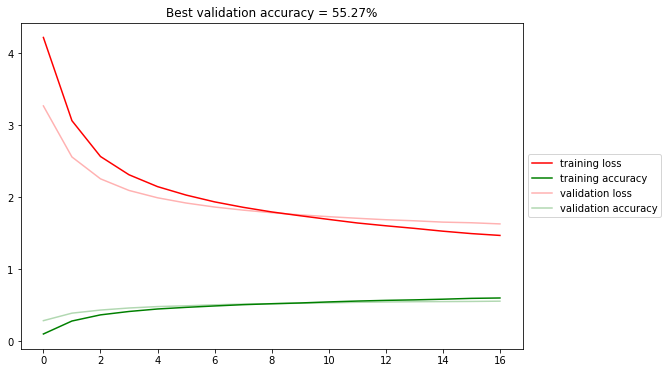

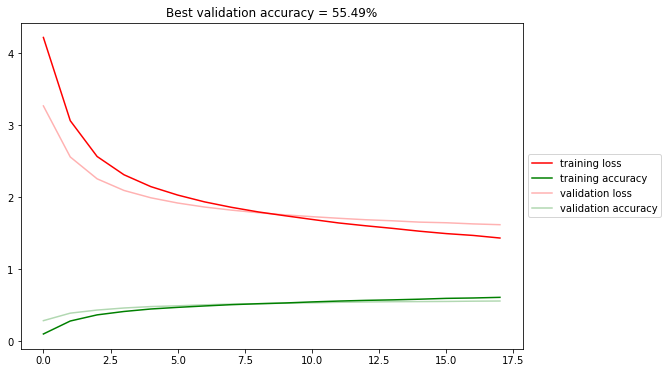

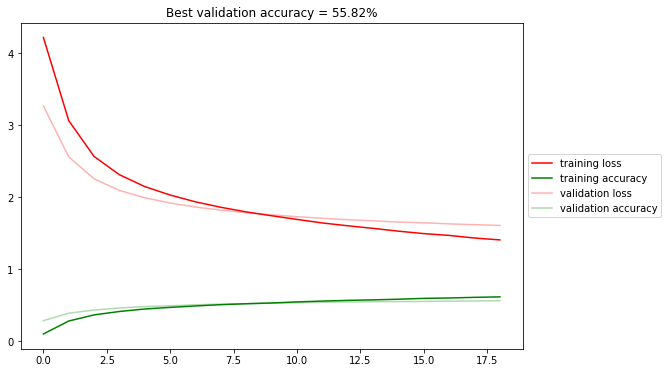

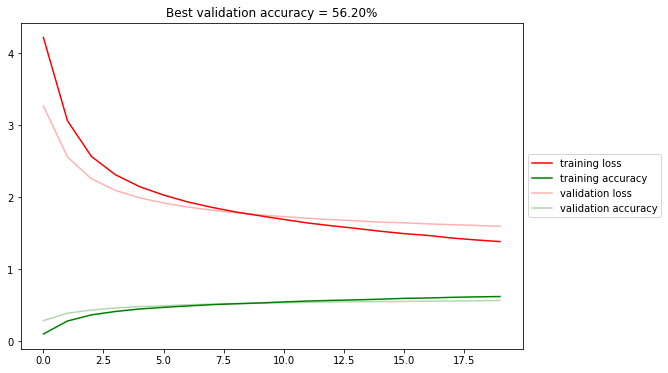

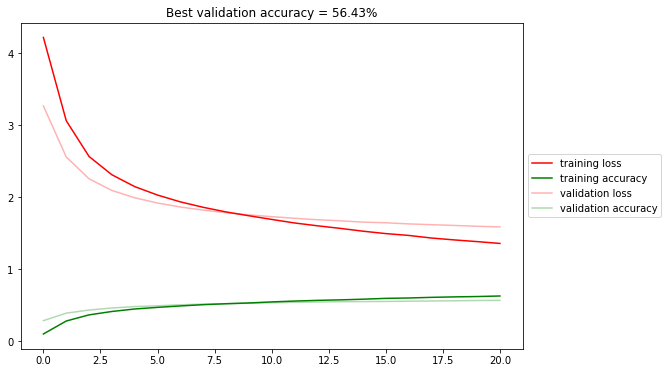

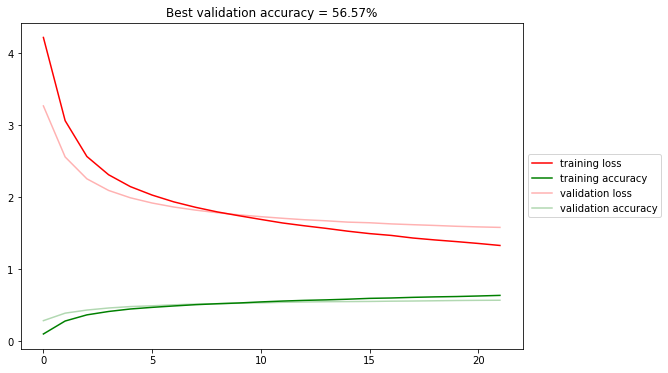

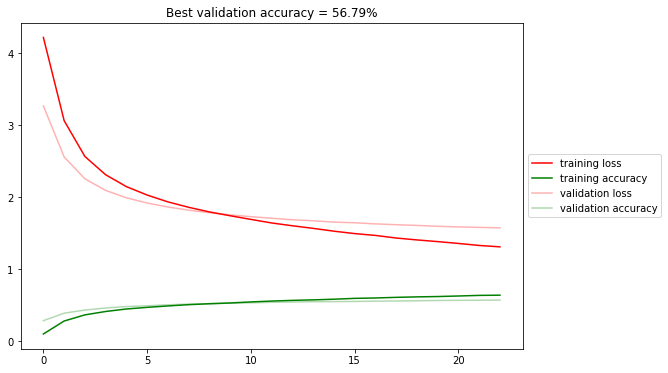

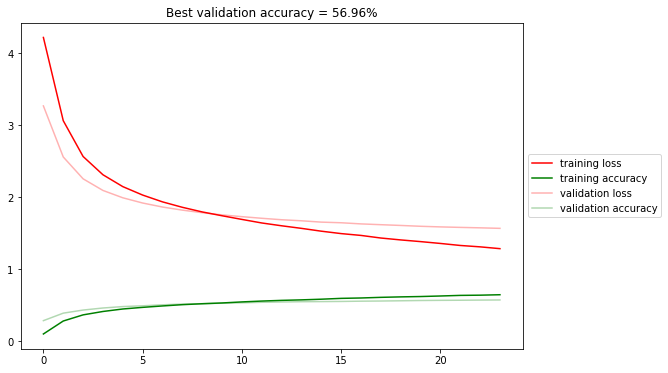

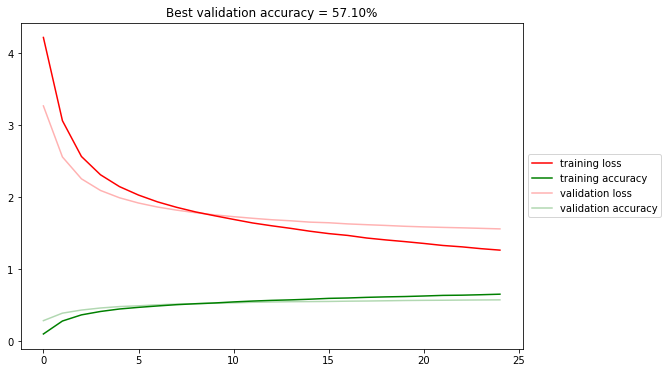

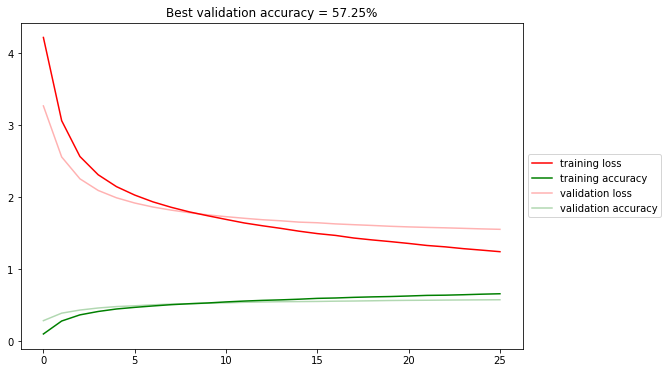

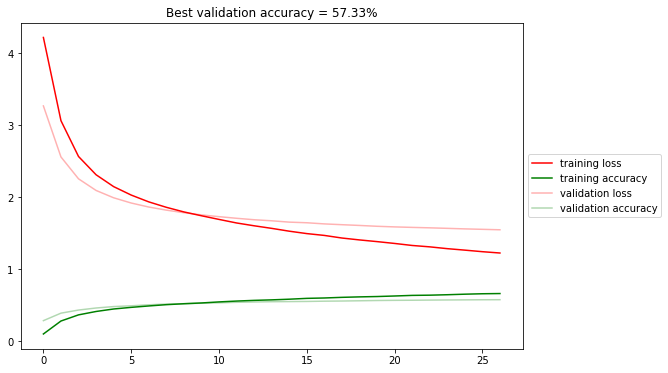

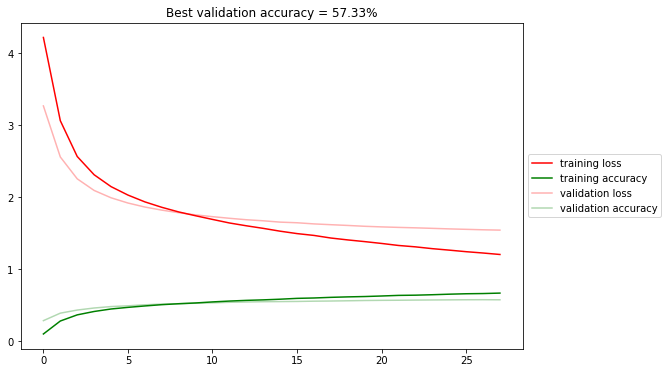

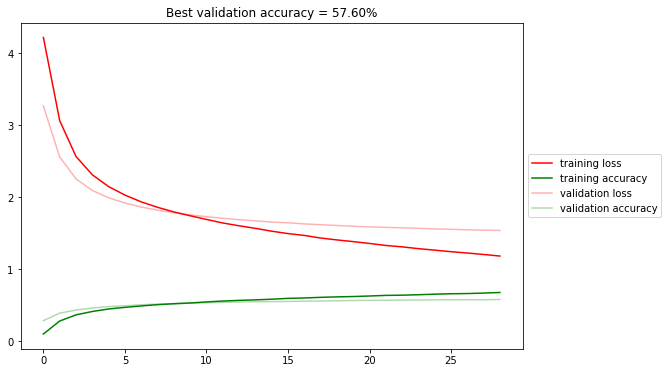

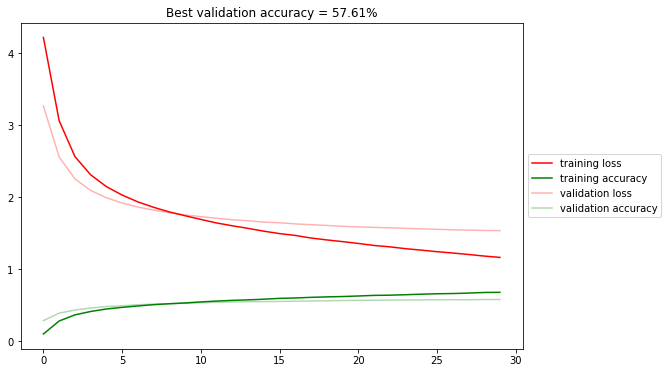

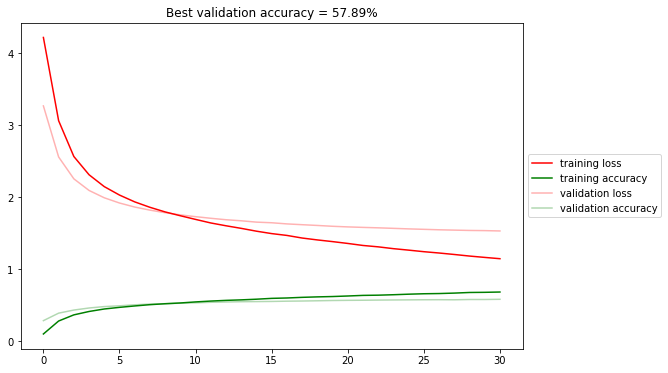

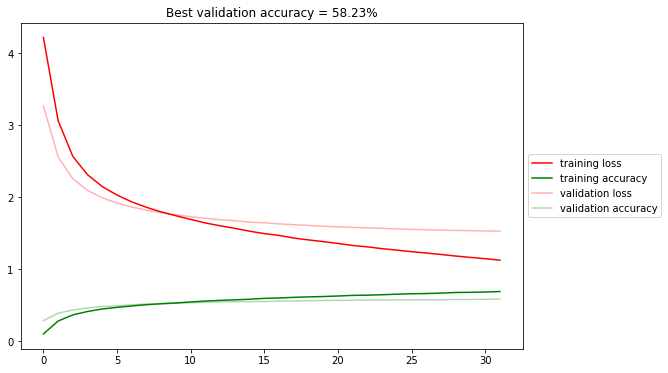

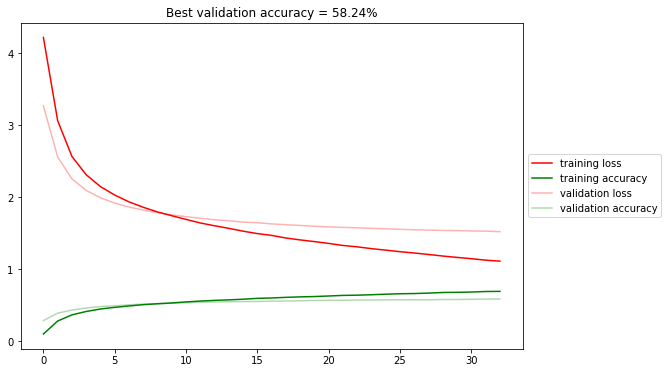

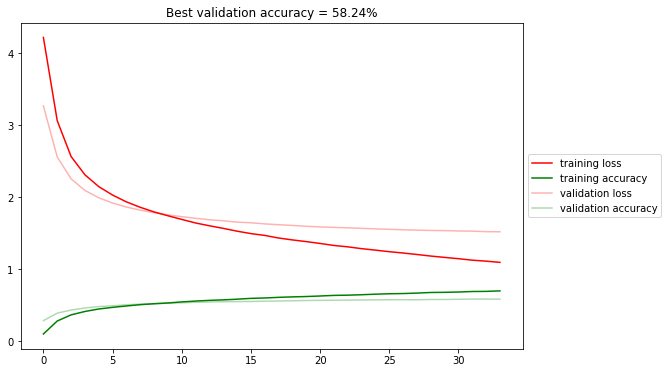

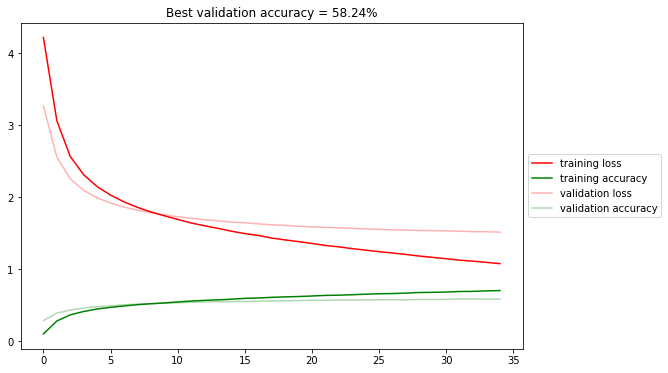

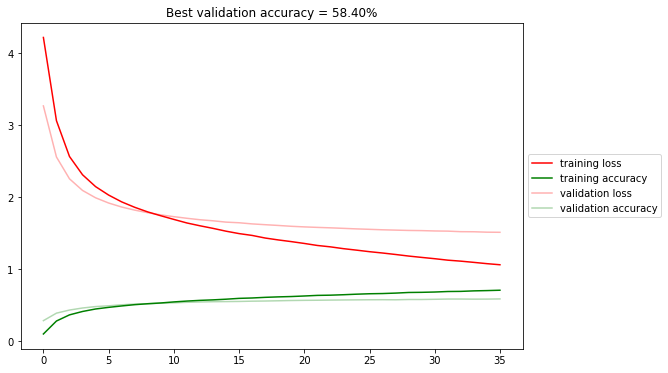

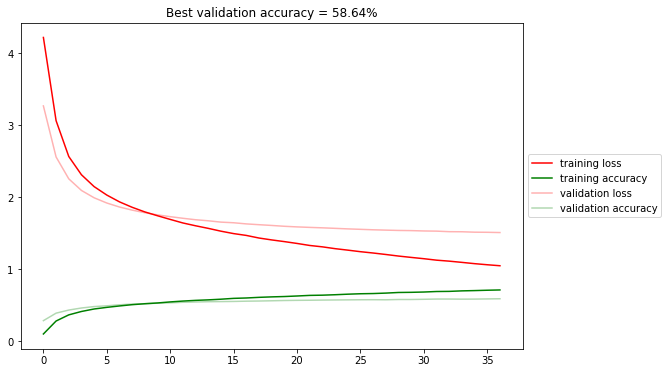

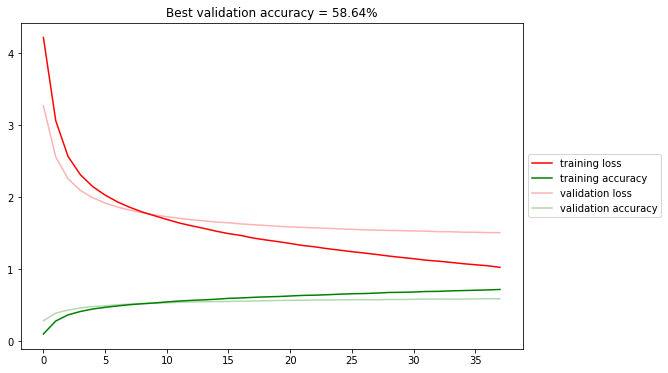

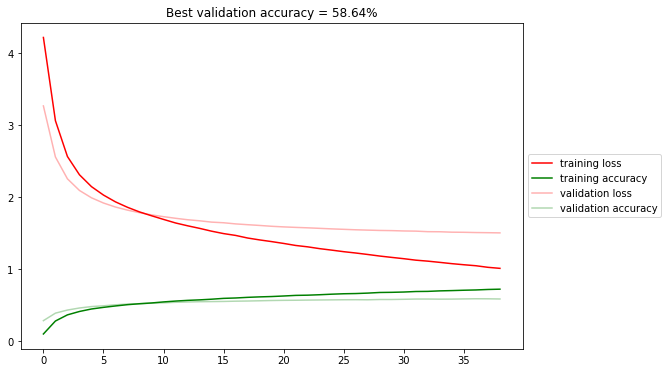

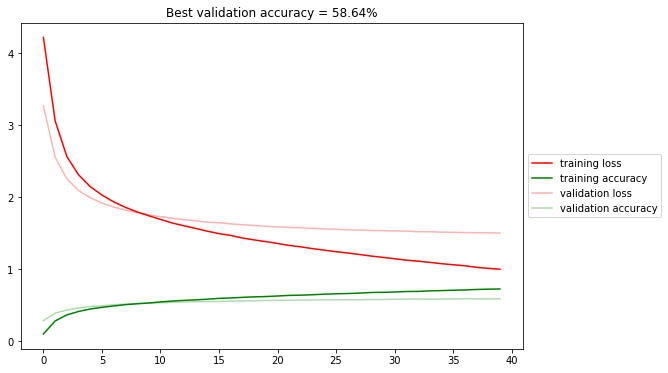

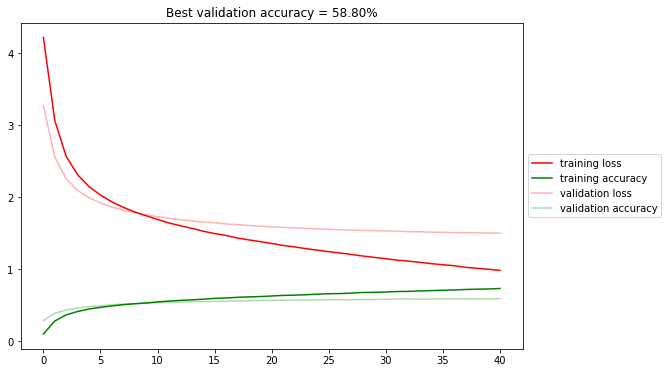

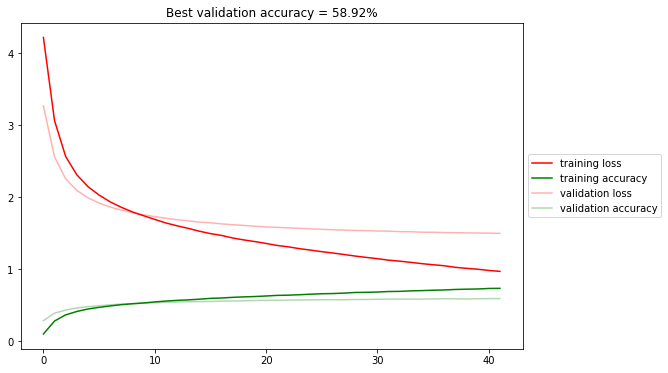

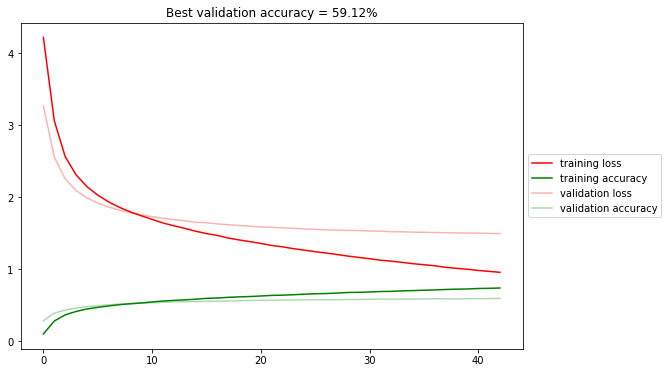

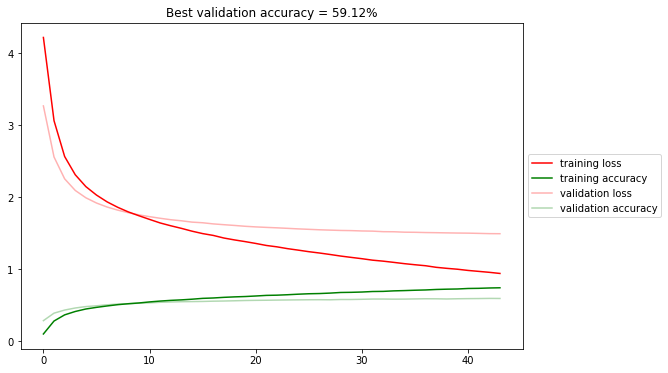

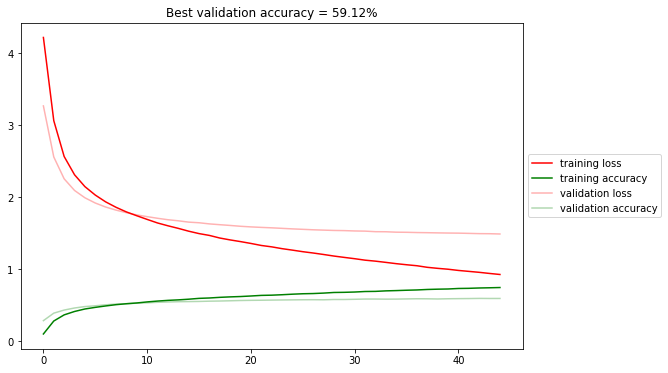

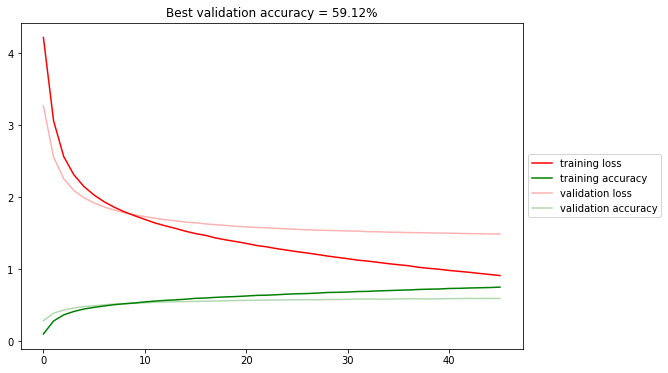

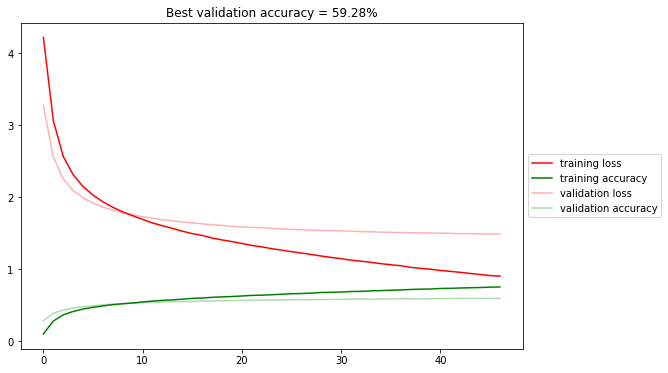

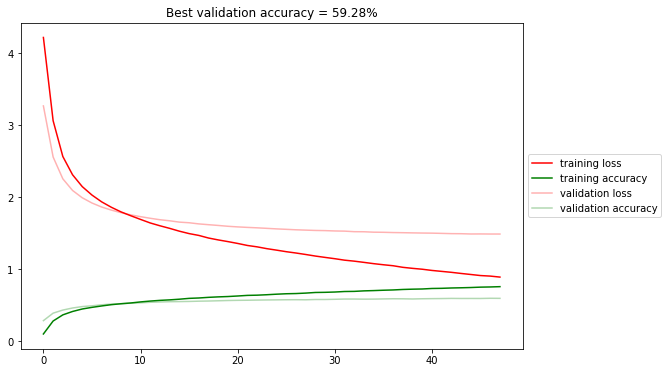

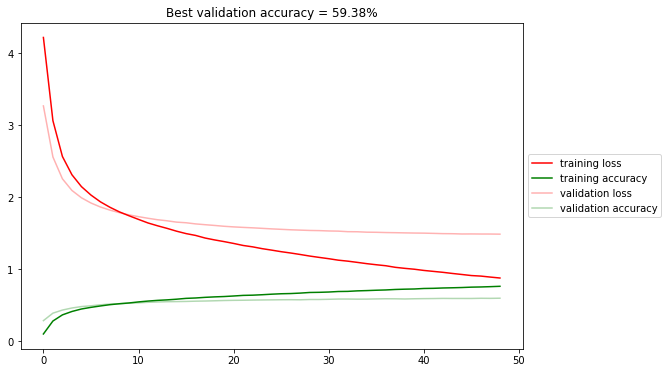

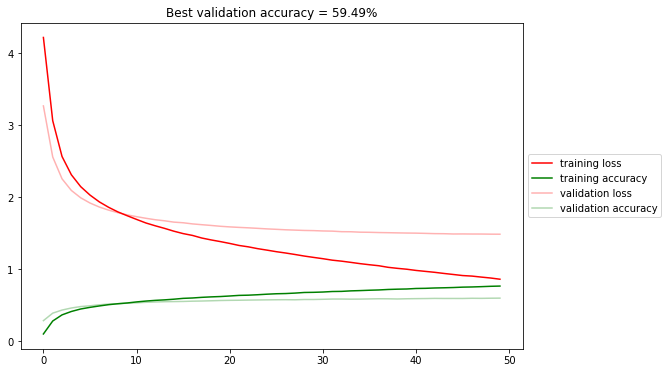

In [8]:
fit_model(model, X_train, y_train, X_test, y_test, 50, 128)